In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings

warnings.filterwarnings("ignore")

## 1. Data Exploration

In [3]:
sample_submission = pd.read_csv("dataset/sample_submission.csv")
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [5]:
sample_submission.sample(5)

,id,Exited
11757,176791,0.5
11872,176906,0.5
80168,245202,0.5
49473,214507,0.5
18516,183550,0.5


In [6]:
train.sample(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7066,7066,15668853,Tuan,754,Spain,Female,30.0,3,108128.82,1,1.0,1.0,59351.79,0
8136,8136,15694859,Chibueze,745,France,Female,33.0,7,111739.62,1,1.0,0.0,59559.02,0
134747,134747,15658852,Ch'en,559,Germany,Male,34.0,1,114514.71,2,1.0,1.0,122021.33,0
122931,122931,15654519,Nnaife,779,Spain,Male,29.0,8,0.00,2,1.0,0.0,101319.76,0
148499,148499,15596228,French,577,Spain,Male,31.0,3,140014.42,1,0.0,1.0,86350.97,0


In [7]:
test.sample(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
99079,264113,15605020,Pirozzi,641,France,Female,28.0,4,0.00,2,1.0,0.0,178222.93
5222,170256,15754849,Hsing,687,Spain,Female,30.0,1,0.00,2,1.0,1.0,180591.32
57177,222211,15704053,Ch'ien,775,France,Male,28.0,7,157559.05,1,1.0,1.0,179869.59
45868,210902,15710397,Lin,568,France,Male,26.0,4,0.00,2,0.0,1.0,147600.54
106028,271062,15697318,Hs?,749,France,Female,29.0,7,0.00,2,1.0,1.0,155722.66


In [8]:
print("Training Data Information:")
print(train.info())
print("\nTraining Data Descriptive Statistics:")
print(train.describe().T)

# Printing information and descriptive statistics for df_test
print("\nTesting Data Information:")
print(test.info())
print("\nTesting Data Descriptive Statistics:")
print(test.describe().T)

Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
None

Training Data Descriptive Statistics:
   

## 2. Exploritory Data Analysis
### 2.1 Null Values

In [51]:
# Generate formatted string representation of isnull count for train data
train_isnull_count = train.isnull().sum().to_string()

# Generate formatted string representation of isnull count for test data
test_isnull_count = test.isnull().sum().to_string()

# Print the formatted output
print(
    "Train data isnull count:\n",
    train_isnull_count,
    "\n\nTest data isnull count:\n",
    test_isnull_count,
)

Train data isnull count:
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0 

Test data isnull count:
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0


### 2.2 Target Variable

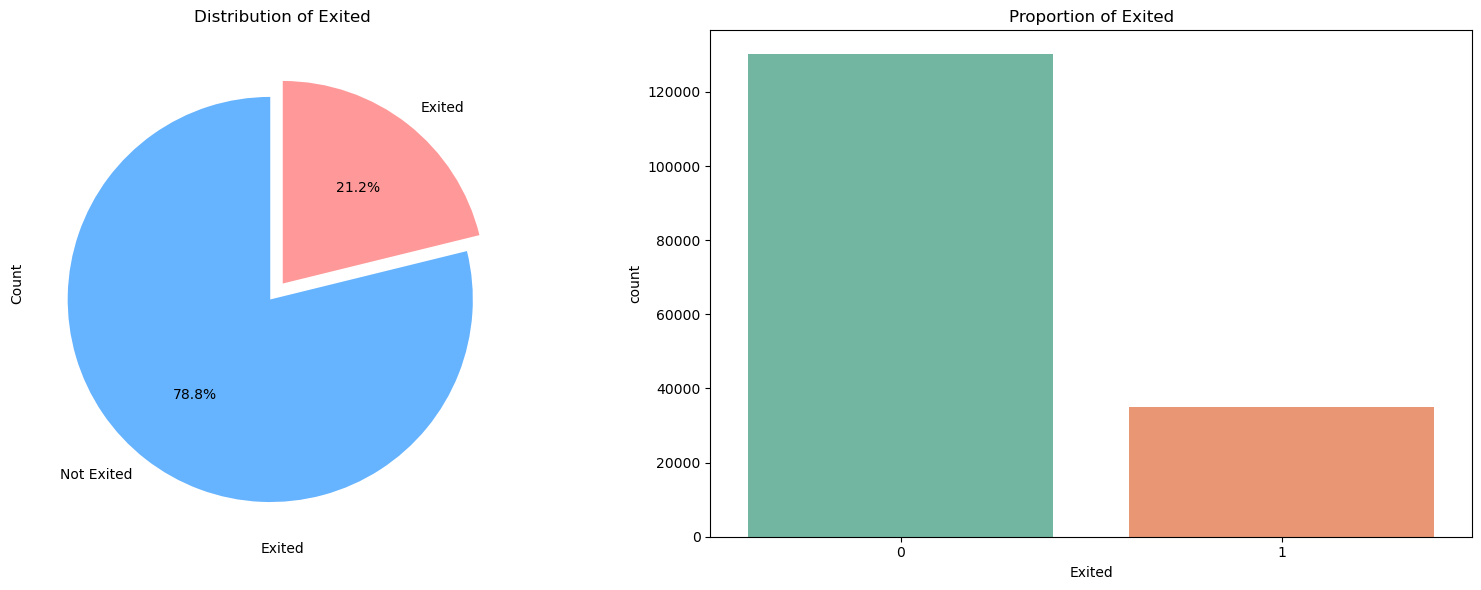

In [12]:
# 创建一个包含两个子图的图形
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 绘制饼图
train["Exited"].value_counts().plot.pie(
    autopct="%1.1f%%",
    ax=axes[0],
    startangle=90,
    colors=["#66b3ff", "#ff9999"],
    explode=(0.1, 0),
    labels=["Not Exited", "Exited"],
)
axes[1].set_title("Proportion of Exited")
axes[1].set_ylabel("")  # 移除默认的'y'标签

# 绘制计数图
sns.countplot(x="Exited", data=train, ax=axes[1], palette="Set2")
axes[0].set_title("Distribution of Exited")
axes[0].set_xlabel("Exited")
axes[0].set_ylabel("Count")
plt.tight_layout()
plt.show()

### 2.3 Categorical Variables Analysis

In [58]:
# Identify categorical variables based on unique value counts
categorical_vars = []
continuous_vars = []
for col in train.columns:
    unique_vals = train[col].unique()
    if len(unique_vals) <= 10:  # Adjust the threshold as needed
        categorical_vars.append(col)
    else:
        continuous_vars.append(col)
# Convert to lists
categorical_vars_list = list(categorical_vars)
continuous_vars_list = list(continuous_vars)

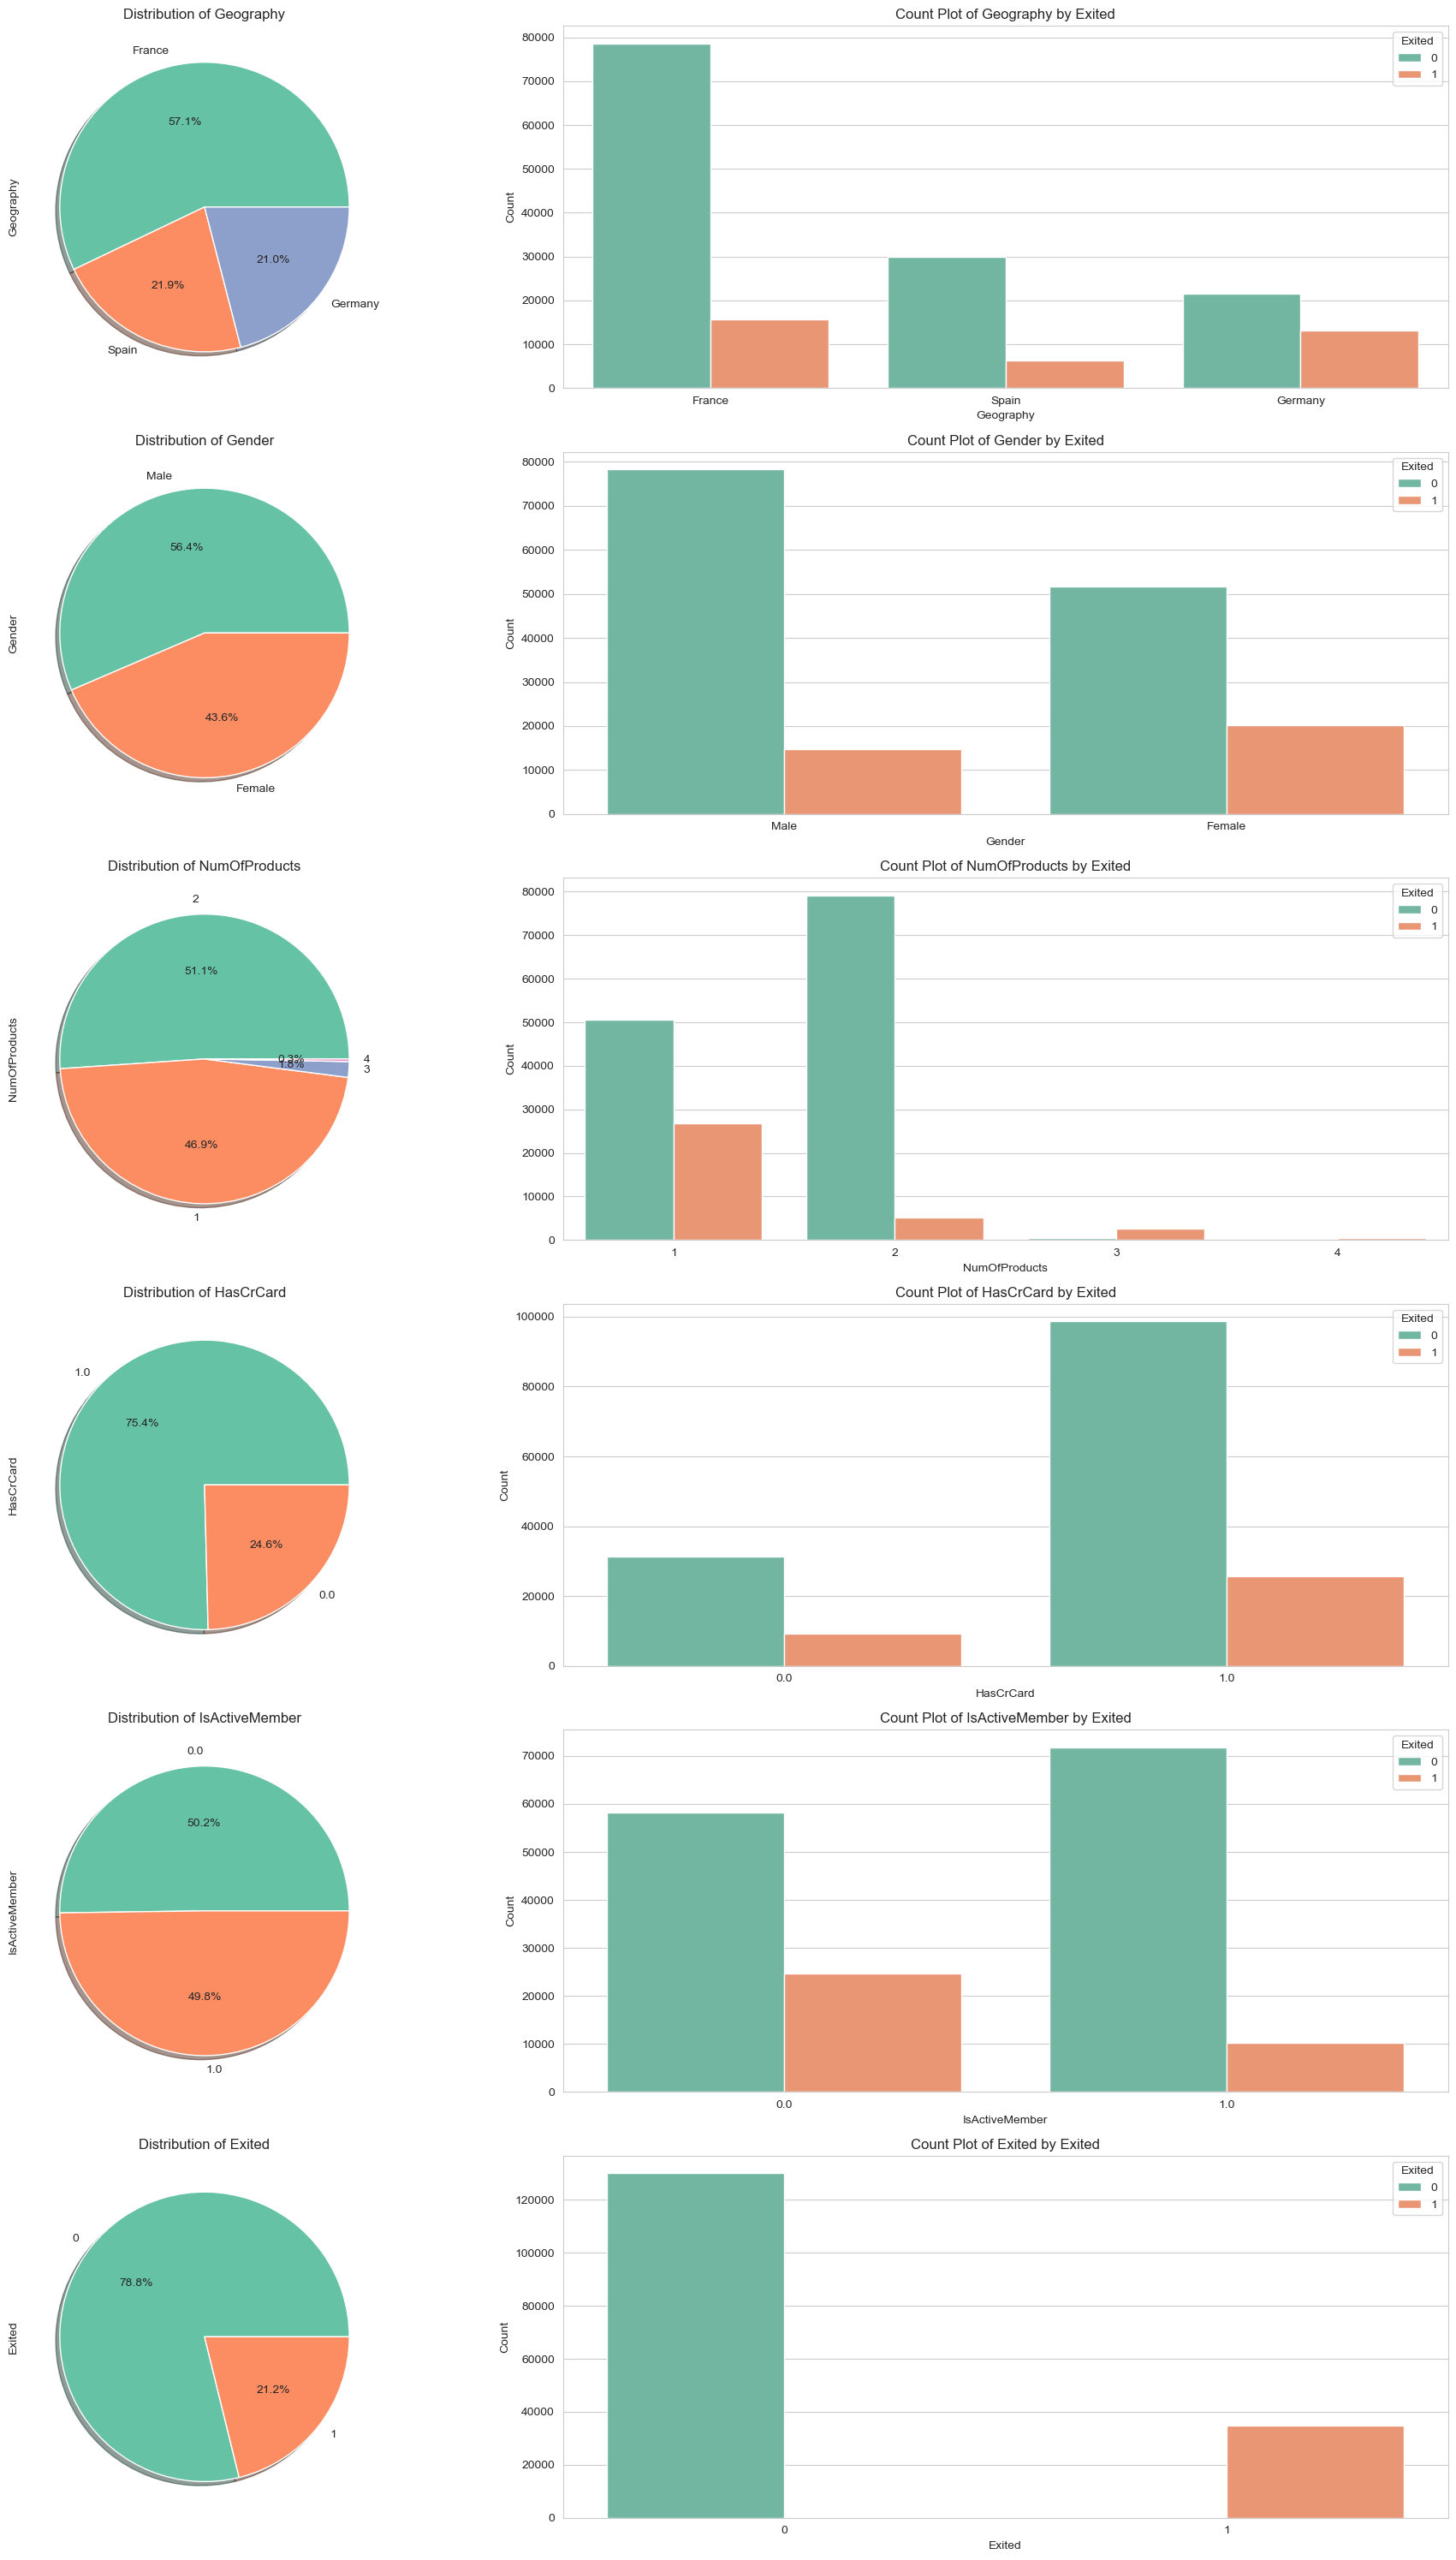

In [32]:
categorical_vars_list.remove("Exited")

# 设置图形大小，假设每行有2个子图
fig, axes = plt.subplots(
    nrows=len(categorical_vars), ncols=2, figsize=(20, len(categorical_vars) * 5)
)

# 遍历每个分类变量，绘制图形
for i, column in enumerate(categorical_vars):
    # 获取当前变量的所有不同取值
    categories = train[column].unique()

    # 定义颜色列表，确保每个取值对应的颜色是一致的
    colors = sns.color_palette("Set2", len(categories))

    # 绘制饼图
    train[column].value_counts().plot.pie(
        autopct="%1.1f%%", ax=axes[i, 0], shadow=True, colors=colors
    )
    axes[i, 0].set_ylabel(column)
    axes[i, 0].set_aspect("equal")  # 设置饼图为圆形
    axes[i, 0].set_title(f"Distribution of {column}")

    # 绘制计数图
    sns.countplot(x=column, hue="Exited", data=train, ax=axes[i, 1], palette="Set2")
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel("Count")
    axes[i, 1].set_title(f"Count Plot of {column} by Exited")

# 调整布局和显示图形
plt.tight_layout()
plt.show()

### 2.4 Numerical Value Analysis

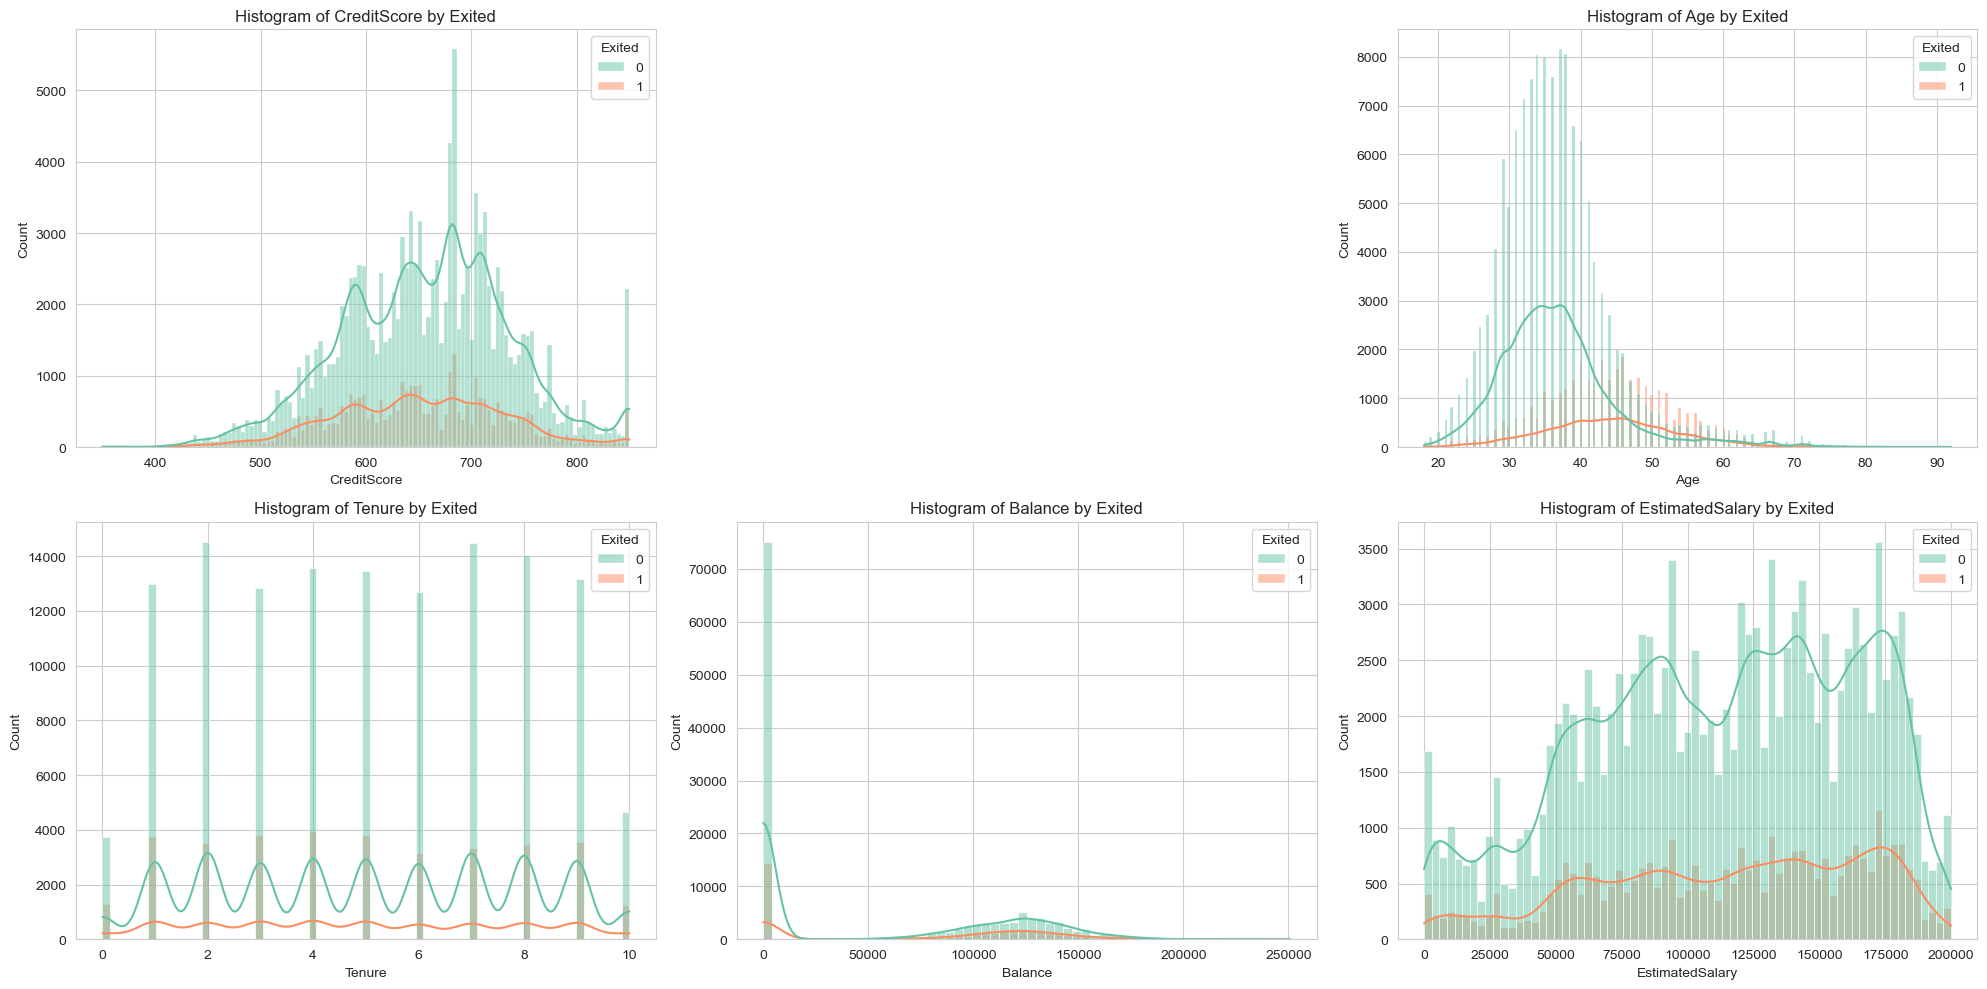

In [59]:
# Remove 'CustomerId' and 'Surname' from continuous_vars_list
continuous_vars_list.remove("id")


continuous_vars_list.remove("CustomerId")


continuous_vars_list.remove("Surname")



# Customize seaborn style


sns.set_style("whitegrid")



# Define color palette


palette = sns.color_palette("Set2", len(categories))

# 属性列表
numerical_features = continuous_vars_list

# 设置图形大小，使用GridSpec调整布局
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 3, figure=fig)

# 设置子图轴
axes = [
    fig.add_subplot(gs[0, 0]),  # 第一行左图
    fig.add_subplot(gs[0, 2]),  # 第一行右图
    fig.add_subplot(gs[1, 0]),  # 第二行左图
    fig.add_subplot(gs[1, 1]),  # 第二行中图
    fig.add_subplot(gs[1, 2]),
]  # 第二行右图

# 绘制每个属性的直方图
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.histplot(data=train, x=feature, hue="Exited", kde=True, ax=ax, palette=palette)
    ax.set_title(f"Histogram of {feature} by Exited")

plt.tight_layout()
plt.show()



# # 属性列表


# numerical_features = continuous_vars_list



# # 设置图形大小，保持每个子图的尺寸和原先2行3列时一致


# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))



# # 绘制每个属性的箱线图和直方图


# for i, feature in enumerate(numerical_features):


#     # 绘制箱线图


#     sns.boxplot(x=train[feature], ax=axes[i, 0])


#     axes[i, 0].set_title(f"Box Plot of {feature}")



#     # 绘制直方图，增加hue参数以区分Exited变量
#     sns.histplot(
#         data=train, x=feature, hue="Exited", kde=True, ax=axes[i, 1], palette=palette
#     )
#     axes[i, 1].set_title(f"Histogram of {feature} by Exited")



# plt.tight_layout()


# plt.show()

### 2.5 Correlation Analysis

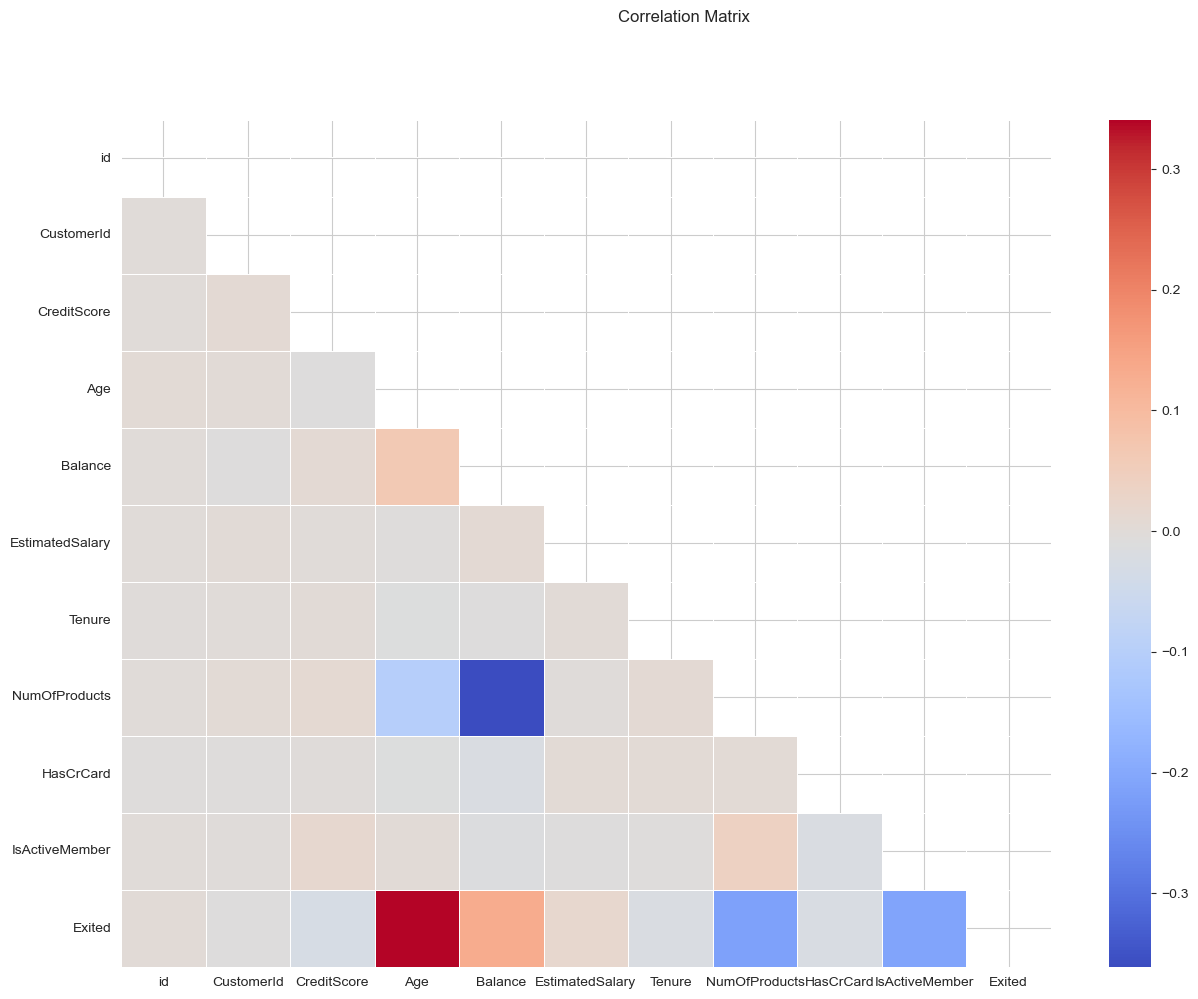

In [64]:
# Compute the correlation matrix
df1 = train[
    [
        "id",
        "CustomerId",
        "CreditScore",
        "Age",
        "Balance",
        "EstimatedSalary",
        "Tenure",
        "NumOfProducts",
        "HasCrCard",
        "IsActiveMember",
        "Exited",
    ]
].copy()

corr_matrix = df1.corr()

# Create a mask to hide the upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(
    corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5
)
plt.suptitle("Correlation Matrix")
plt.show()

### 异常值检测

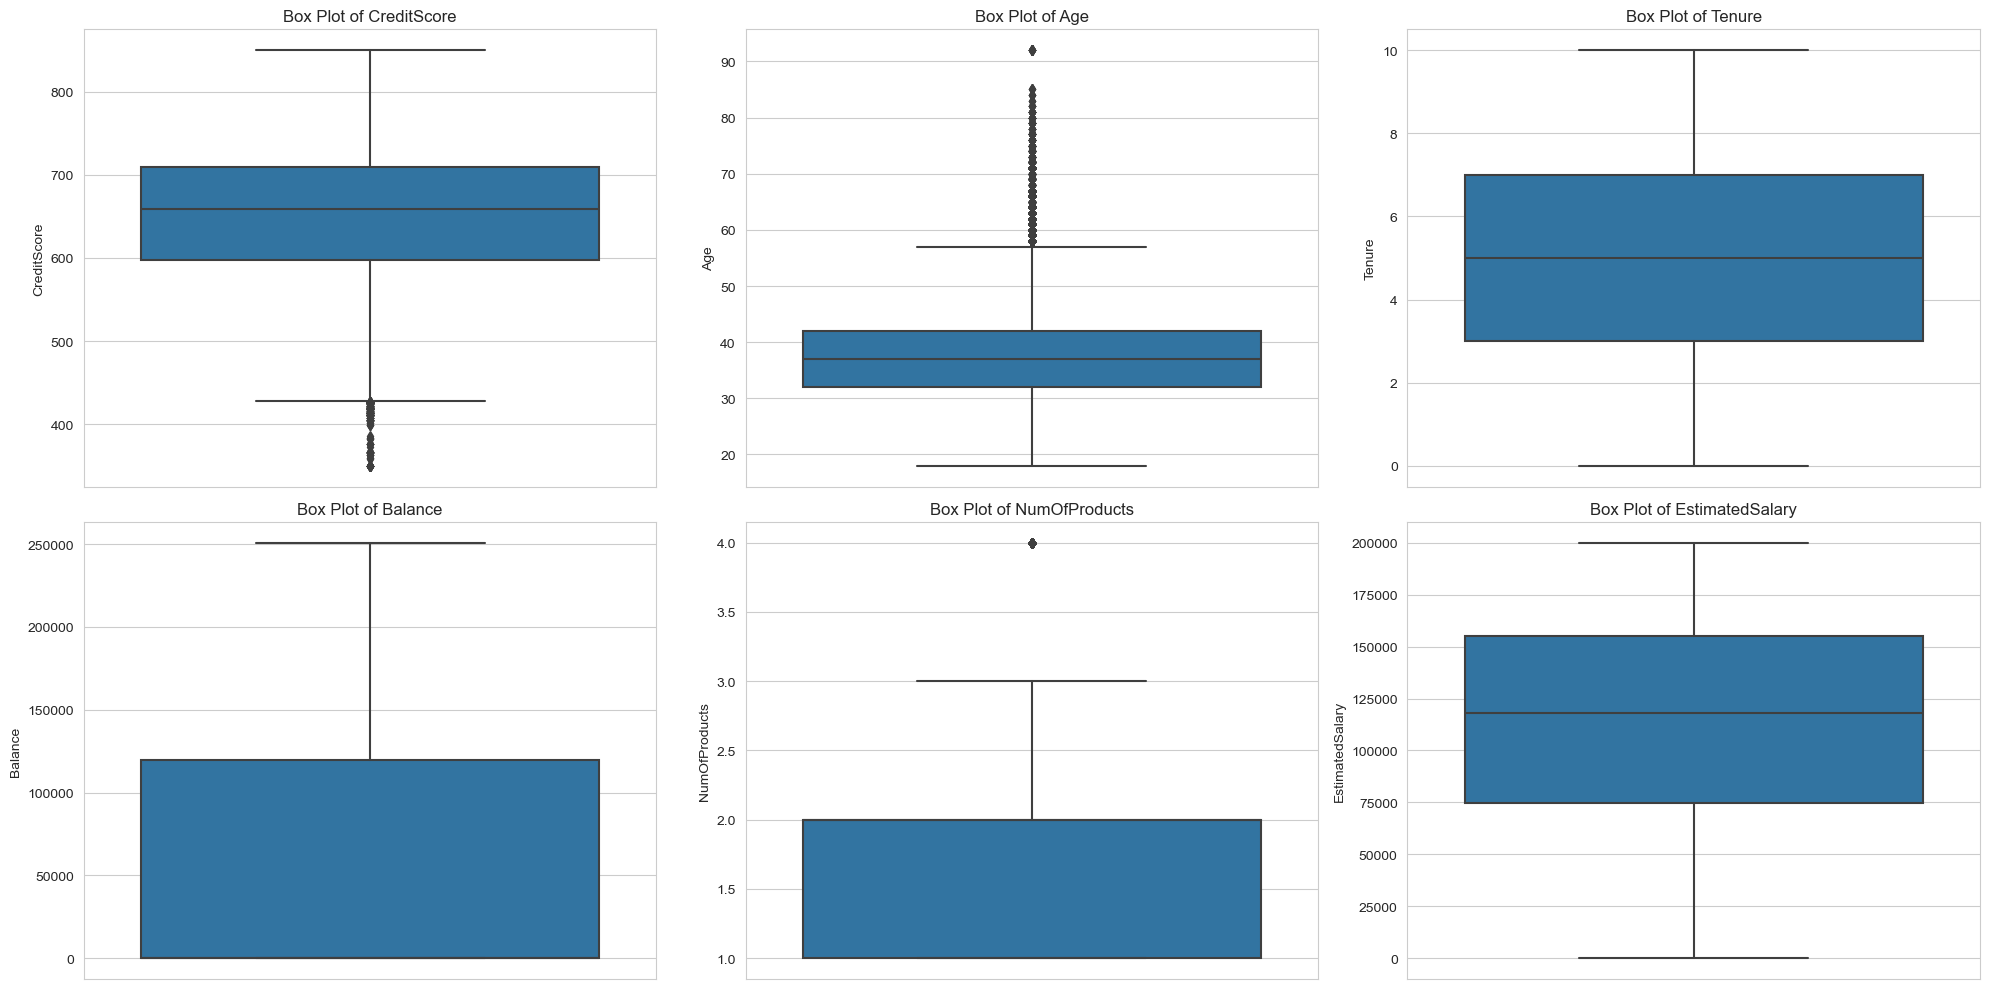

In [60]:
abnormal_detection_vars = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "EstimatedSalary",
]
abnormal_detection_vars_list = list(abnormal_detection_vars)

# 设置图形大小，使用GridSpec调整布局
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 3, figure=fig)

# 设置子图轴
axes = [
    fig.add_subplot(gs[0, 0]),  # 第一行左图
    fig.add_subplot(gs[0, 1]),  # 第一行中图
    fig.add_subplot(gs[0, 2]),  # 第一行右图
    fig.add_subplot(gs[1, 0]),  # 第二行左图
    fig.add_subplot(gs[1, 1]),  # 第二行中图
    fig.add_subplot(gs[1, 2]),
]  # 第二行右图

# 绘制每个属性的箱型图
for i, feature in enumerate(abnormal_detection_vars_list):
    ax = axes[i]
    sns.boxplot(y=train[feature], ax=ax)
    ax.set_title(f"Box Plot of {feature}")

# 调整布局
plt.tight_layout()
plt.show()

## 3. Modelling

### 数据模型训练

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: Logistic Regression
Best Parameters: {'model__penalty': 'l2', 'model__C': 1}
Accuracy: 0.8550913442603084
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.72      0.51      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



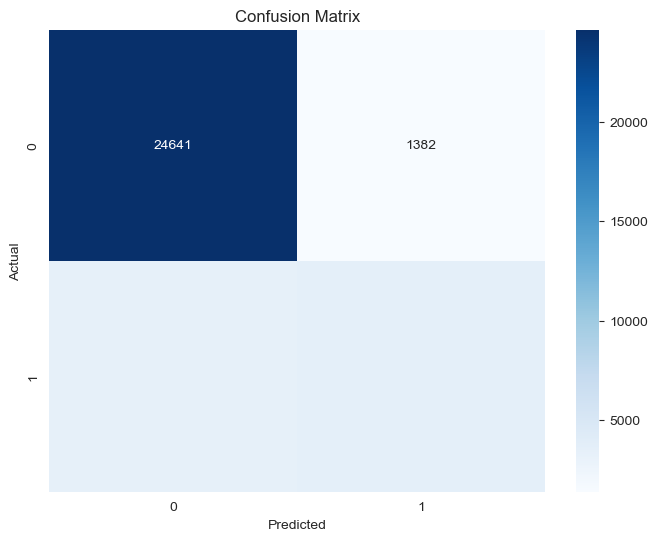

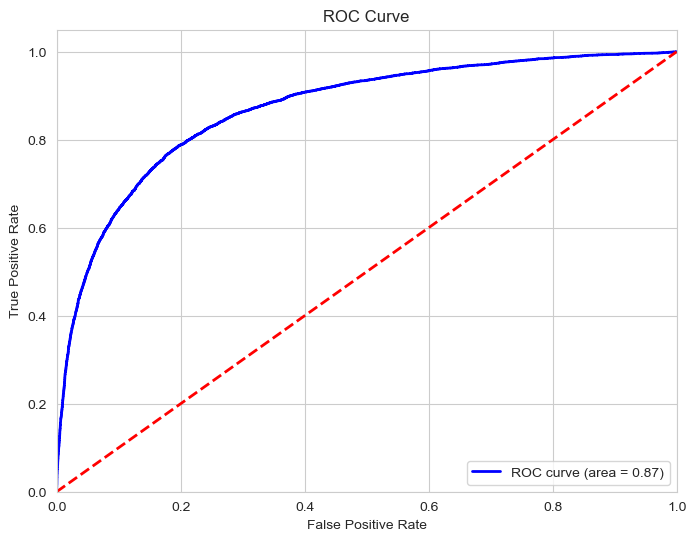

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: Random Forest
Best Parameters: {'model__n_estimators': 200, 'model__max_depth': 10}
Accuracy: 0.8620292665192232
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     26023
           1       0.77      0.49      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



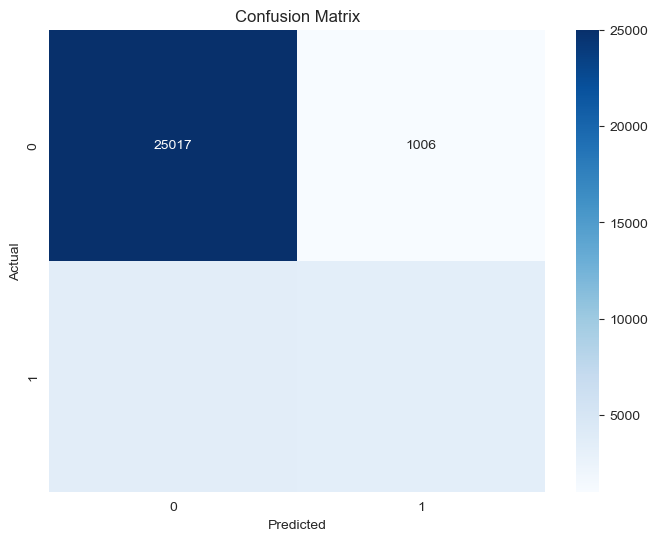

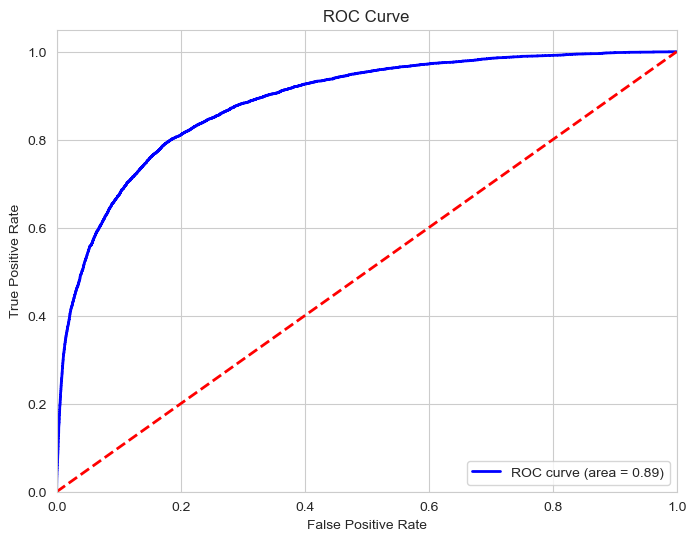

Fitting 3 folds for each of 12 candidates, totalling 36 fits


: 

In [62]:
# 分割特征和目标变量
X = train.drop(["id", "CustomerId", "Surname", "Exited"], axis=1)
y = train["Exited"]

# 分割训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 定义预处理器
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            StandardScaler(),
            ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"],
        ),
        (
            "cat",
            OneHotEncoder(drop="first"),
            ["Geography", "Gender", "IsActiveMember", "HasCrCard", "NumOfProducts"],
        ),
    ],
    remainder="passthrough",
)

# 定义带有自适应超参数的模型
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier()),
]

# 对每个模型进行随机搜索和交叉验证
for name, model in models:
    # 创建pipeline，包括数据预处理和模型
    pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])

# Define models with reduced hyperparameter grids
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier()),
]

# Perform randomized search with cross-validation for each model
for name, model in models:
    # Create pipeline including data preprocessing and the model
    pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])

    # Define reduced parameter distributions for randomized search
    param_distributions = {}
    if name == "Logistic Regression":
        param_distributions = {
            "model__C": [0.01, 0.1, 1, 10],
            "model__penalty": ["l1", "l2"],
        }
    elif name == "Random Forest":
        param_distributions = {
            "model__n_estimators": [100, 200],
            "model__max_depth": [None, 10, 20],
        }
    elif name == "Gradient Boosting":
        param_distributions = {
            "model__n_estimators": [100, 200],
            "model__learning_rate": [0.01, 0.1],
            "model__max_depth": [3, 4, 5],
        }
    elif name == "XGBoost":
        param_distributions = {
            "model__max_depth": [3, 4, 5],
            "model__learning_rate": [0.01, 0.1],
        }

    # Perform randomized search with cross-validation
    randomized_search = RandomizedSearchCV(
        pipeline,
        param_distributions,
        n_iter=20,
        cv=3,
        scoring="roc_auc",
        verbose=3,
        n_jobs=-1,
    )
    randomized_search.fit(X_train, y_train)

    # Get the best model from randomized search
    best_model = randomized_search.best_estimator_

    # Predict on validation set
    y_pred = best_model.predict(X_val)

    # Print model evaluation metrics
    print("Model:", name)
    print("Best Parameters:", randomized_search.best_params_)
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap="Blues", fmt="g")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if hasattr(best_model.named_steps["model"], "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
        roc_auc = roc_auc_score(y_val, y_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(
            fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc
        )
        plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.show()

### 数据整理

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: Logistic Regression
Best Parameters: {'model__penalty': 'l2', 'model__C': 1}
Accuracy: 0.8550913442603084
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.72      0.51      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: Random Forest
Best Parameters: {'model__n_estimators': 200, 'model__max_depth': 10}
Accuracy: 0.8616051140667131
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     26023
           1       0.77      0.49      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
we

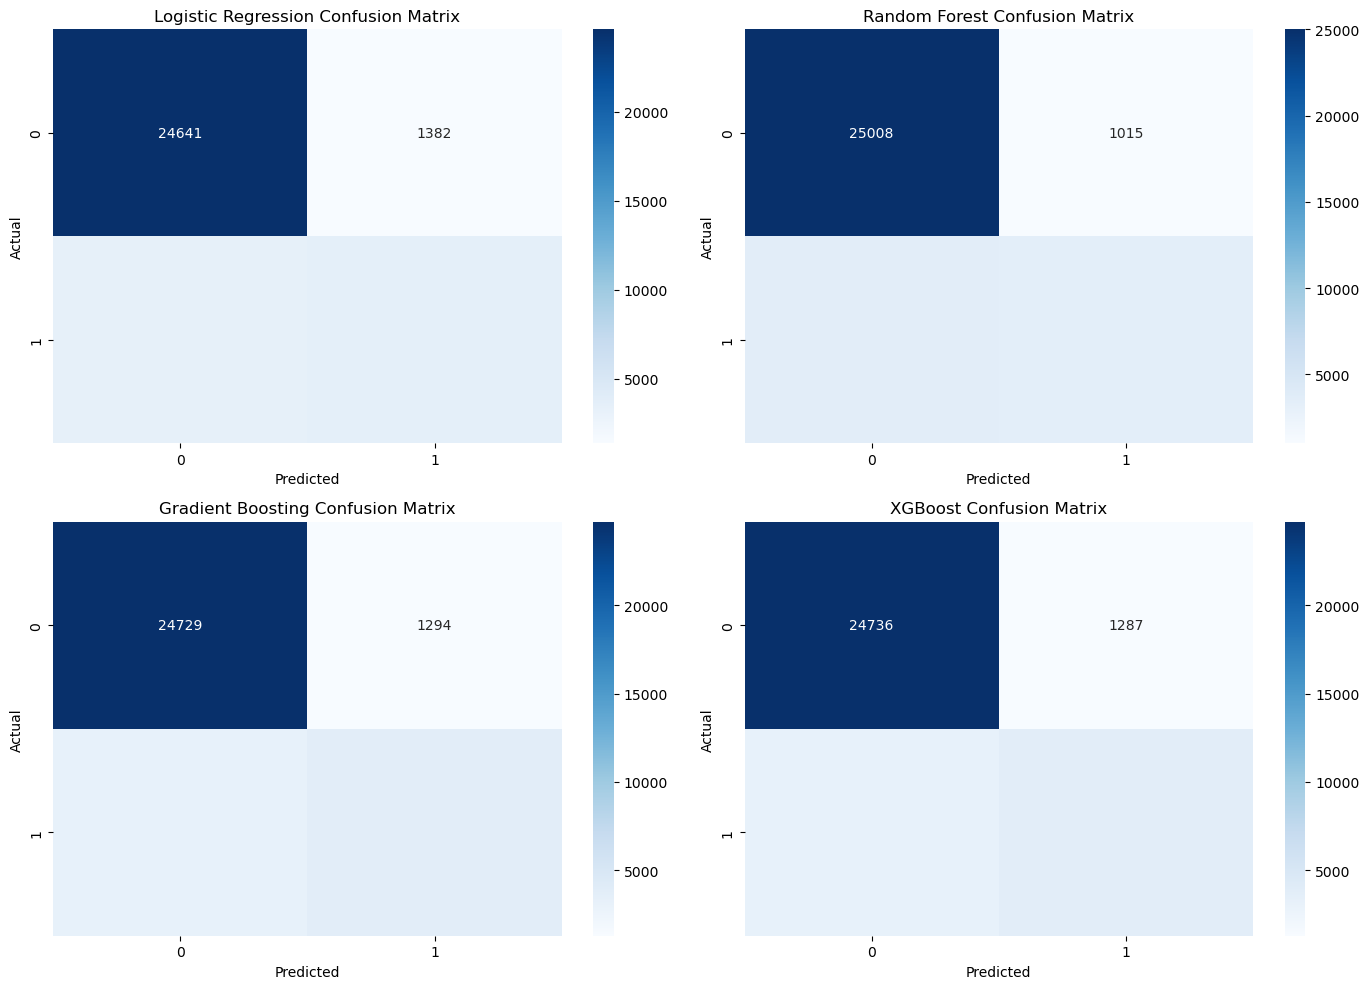

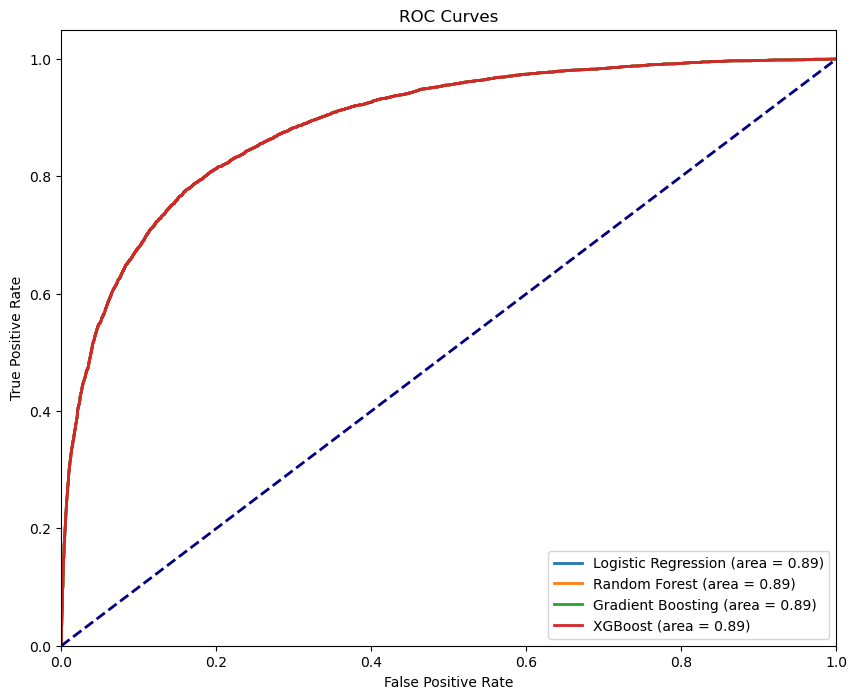

Model Comparison Report
Model                Accuracy   Recall     F1 Score  
Logistic Regression  0.8550913442603084 0.8550913442603084 0.8455546030108713
Random Forest        0.8616051140667131 0.8616051140667131 0.8494574958906003
Gradient Boosting    0.8657860453843124 0.8657860453843124 0.8578860113389223
XGBoost              0.8656951555730603 0.8656951555730603 0.8577016282614137


In [4]:
# 分割特征和目标变量
X = train.drop(["id", "CustomerId", "Surname", "Exited"], axis=1)
y = train["Exited"]

# 分割训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 定义预处理器
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            StandardScaler(),
            ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"],
        ),
        (
            "cat",
            OneHotEncoder(drop="first"),
            ["Geography", "Gender", "IsActiveMember", "HasCrCard", "NumOfProducts"],
        ),
    ],
    remainder="passthrough",
)

# 定义带有自适应超参数的模型
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier()),
]

# 对每个模型进行随机搜索和交叉验证
for name, model in models:
    # 创建pipeline，包括数据预处理和模型
    pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])

# Define models with reduced hyperparameter grids
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier()),
]

# Placeholder for storing results
results = []

# Perform randomized search with cross-validation for each model
for name, model in models:
    # Create pipeline including data preprocessing and the model
    pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])

    # Define reduced parameter distributions for randomized search
    param_distributions = {}
    if name == "Logistic Regression":
        param_distributions = {
            "model__C": [0.01, 0.1, 1, 10],
            "model__penalty": ["l1", "l2"],
        }
    elif name == "Random Forest":
        param_distributions = {
            "model__n_estimators": [100, 200],
            "model__max_depth": [None, 10, 20],
        }
    elif name == "Gradient Boosting":
        param_distributions = {
            "model__n_estimators": [100, 200],
            "model__learning_rate": [0.01, 0.1],
            "model__max_depth": [3, 4, 5],
        }
    elif name == "XGBoost":
        param_distributions = {
            "model__max_depth": [3, 4, 5],
            "model__learning_rate": [0.01, 0.1],
        }

    # Perform randomized search with cross-validation
    randomized_search = RandomizedSearchCV(
        pipeline,
        param_distributions,
        n_iter=20,
        cv=3,
        scoring="roc_auc",
        verbose=3,
        n_jobs=-1,
    )
    randomized_search.fit(X_train, y_train)

    # Get the best model from randomized search
    best_model = randomized_search.best_estimator_

    # Predict on validation set
    y_pred = best_model.predict(X_val)

    # Store model results
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    results.append(
        {
            "Model": name,
            "Accuracy": accuracy,
            "Recall": report["weighted avg"]["recall"],
            "F1 Score": report["weighted avg"]["f1-score"],
            "Best Parameters": randomized_search.best_params_,
            "Confusion Matrix": confusion_matrix(y_val, y_pred),
        }
    )

    # Print model evaluation metrics
    print("Model:", name)
    print("Best Parameters:", randomized_search.best_params_)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

# Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, result in zip(axes, results):
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt="g", cmap="Blues", ax=ax)
    ax.set_title(f"{result['Model']} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(10, 8))

for result in results:
    if hasattr(best_model.named_steps["model"], "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        plt.plot(fpr, tpr, lw=2, label=f"{result['Model']} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

# Print summarized report
print("Model Comparison Report")
header = ["Model", "Accuracy", "Recall", "F1 Score"]
rows = [header] + [[result[h] for h in header] for result in results]

for row in rows:
    print("{:<20} {:<10} {:<10} {:<10}".format(*row))

## 4. Submission

In [5]:
# Extract features from the test data
test_data = test.drop(["CustomerId", "Surname"], axis=1)

# Make predictions using the best trained model
submission = best_model.predict(test_data)

# Create a submission DataFrame with id and prediction
submission_df = pd.DataFrame({"id": test["id"], "Exited": submission})

# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission.csv", index=False)